See [here](https://colab.research.google.com/drive/1_MmJuotDr9izNwivjgfD1J_bd4OvTFLq) for installing R + brms.

## Setup code
Run the following commands once (~2-3 mins).  It will replace your python2 jupyter kernel by R kernel.

Then, go to menu **Runtime -> Manage Sessions -> TERMINATE**.  

Finally, **RECONNECT**, skip **Setup** and  run **R Code** section.

In [ ]:
!apt-get install libssl-dev > /dev/null
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x ./Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /conda  > /dev/null 2>&1 
!/conda/bin/conda install -c r r-rstan r-irkernel gxx_linux-64 -y -q > /dev/null 2>&1
!/conda/bin/R -e "IRkernel::installspec(name = 'python2', displayname = 'R', user = FALSE)"  > /dev/null 2>&1
!mkdir /root/.R/
!echo "CXX14FLAGS=-O3 -mtune=native -march=native -Wno-ignored-attributes -Wno-deprecated-declarations" > /root/.R/Makevars
import os
os._exit(00)


--2022-07-28 15:01:24--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-07-28 15:01:24--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  73.06M  63.2MB/s    in 1.2s    

2022-07-28 15:01:25 (63.2 MB/s) - ‘Miniconda3-latest-Linu

In [ ]:
%load_ext rpy2.ipython

## Install libraries

In [ ]:
%%R
PWRF HUBER TUKEY RF
1.034    2     1.034      1.034 

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


In [ ]:
%%R
install.packages('devtools', quiet=TRUE)
library(devtools, quietly=TRUE)
install_github("https://github.com/AndrewjSage/RFLOWESS")

install.packages('randomForestSRC', quiet=TRUE)

library(randomForestSRC, quietly=TRUE)
library(RFLOWESS, quietly=TRUE)

R[write to console]: also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘rlang’, ‘roxygen2’, ‘urlchecker’


R[write to console]: Downloading GitHub repo AndrewjSage/RFLOWESS@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                              
2: CRAN packages only               
3: None                             
4: stringi   (1.7.6 -> 1.7.8) [CRAN]
5: pillar    (1.7.0 -> 1.8.0) [CRAN]
6: tibble    (3.1.7 -> 3.1.8) [CRAN]
7: htmltools (0.5.2 -> 0.5.3) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 


R[write to console]: Installing 15 packages: gridExtra, visNetwork, viridis, influenceR, igraph, downloader, plyr, DiagrammeR, data.tree, randomForest, splitstackshape, reshape2, randomForestSRC, quantregForest, abind

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

* checking for file ‘/tmp/RtmptnXKYb/remotes3b1252fa48/AndrewjSage-RFLOWESS-92ed891/DESCRIPTION’ ... OK
* preparing ‘RFLOWESS’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘RFLOWESS_1.0.1.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: 
 randomForestSRC 3.1.1 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 




In [ ]:
%%R
install_github("https://github.com/AndrewjSage/RFLOWESS")


library(randomForestSRC)
library(RFLOWESS)

UsageError: Cell magic `%%R` not found.


## R code


In [ ]:
%%R

Compute_deltas_PWLS=function(OOBWeights, TRAINY, alpha=6, lambda = 2, method="PWLS", tol=0.001, maxiter=1000){
  if (method%in%c("Tukey", "Huber")) {stop('type must not be either "Tukey" or "Huber".')}
  #Before going into the loop, we're just setting up the matrices and getting the original OOB
  #prediction and residuals
  d <- rep(1, length(TRAINY))
  D0 <- matrix(rep(d, length(TRAINY)), nrow=length(TRAINY), ncol=length(TRAINY), byrow=T)
  AdjWts <- D0 * OOBWeights + 10^-9  #last term adds small amount to ensure weights don't all get set to 0 when alpha is very small
  AdjWts <- AdjWts / rowSums(AdjWts)
  OOBPred <- as.matrix(AdjWts) %*% TRAINY
  resid <- TRAINY- OOBPred
  resid[is.na(resid)] <- mean(abs(resid), na.rm=T)   #if case does not come up OOB set residual to mean of residuals
  niter <- 1
  Change <- 1
  while(Change > tol & niter < maxiter){  #main loop for reweighting
    d0 <- d
    #s <- median(abs(resid))
    #t <- resid/(alpha*s)
    d<- pmin(0.5*lambda/(tol+sqrt(abs(resid))) ,1) #PWLS loss
    D0 <- matrix(rep(d, length(TRAINY)), nrow=length(TRAINY), ncol=length(TRAINY), byrow=T)
    AdjWts <- D0*OOBWeights + 10^-9 # add in very small buffer so that if all are zero we don't divide by 0
    AdjWts <- AdjWts / rowSums(AdjWts)
    OOBPred0 <- OOBPred
    OOBPred <- as.matrix(AdjWts) %*% TRAINY
    resid <- TRAINY - OOBPred
    resid[is.na(resid)] <- mean(abs(resid), na.rm=T)   #if case does not come up OOB
    Change <- mean((OOBPred-OOBPred0)^2)
    niter <- niter + 1
  }
  return(list(d0, OOBPred, niter))
}


#' RFLOWESS Prediction
#'
#' Function to obtain LOWESSRF prediction using case weights for OOB predictions and test predictions
#' by calling Compute_deltas

#' @param OOBWeights  matrix of OOB training case weights
#' @param PredWeights  ntest by ntrain matrix of prediction case weights
#' @param TRAINY  vector of training case response values
#' @param method  should Tukey or Huber weighting function be used?
#' @param tol  maximal tolerance for change between iterations
#' @param maxiter  maximum number of iterations
#' @return returns a list containing
#' 1- vector of LOWESSRF predictions
#' 2- vector of adjusted case weights
#' 3- number of iterations
#' @export




RobustRF <- function(OOBWeights, PredWeights, TRAINY, alpha=6, lambda = 2, method="PWLS", tol=10^-6){
  #print(method)
  if (method%in%c("Tukey", "Huber"))
    Res <- Compute_deltas(OOBWeights=OOBWeights, TRAINY=TRAINY, alpha=alpha, method=method, tol=tol)
  if (method=="PWLS")
    Res <- Compute_deltas_PWLS(OOBWeights=OOBWeights, TRAINY=TRAINY, lambda=lambda, method=method, tol=tol)

  #adjust weights for training cases
  #Res <- Compute_deltas(OOBWeights=OOBWeights, TRAINY=TRAINY, alpha=alpha, method=method, tol=tol)
  d <- Res[[1]]
  niter <- Res[[3]]
  #Apply adjustment to test cases
  D <- matrix(rep(d, nrow(PredWeights)), nrow=nrow(PredWeights), ncol=length(TRAINY), byrow=T)
  AdjWts <- D*PredWeights
  AdjWts <- AdjWts/rowSums(AdjWts)
  Pred <- as.matrix(AdjWts)%*%TRAINY
  return(list(predition=Pred, adjustedweight=AdjWts, iteration=niter,trainingweight=d))
}







In [ ]:
import numpy as np
from scipy import integrate
from mpl_toolkits import mplot3d
import random
import csv
from google.colab import files
import pandas as pd
import scipy.stats as stats
import seaborn as sns 
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
import os
import shutil

# Set parameters
m = 2
p = 0.5
I = 1500
proportion = 0.1 #contamination proportion
# Generate X values
def genXs(I):
  X = [ [0]*6 for i in range(I)]
  #print(X)
  for i in range(I):
      X[i] = np.random.normal(0,1,6)
  #print(X)
  return X

  # Generate y values
def genYs(X):
  Y = []
  I = len(X)
  r = np.random.uniform(0,1,I)
  #print(r)
  for i in range(I):
    signal = 0
    if (X[i][0]<=0) and (X[i][1]<=0):
      signal = signal + 1
    if (X[i][0]<=0) and (X[i][1]>0) and (X[i][3]<=0):
      signal = signal + 2
    if (X[i][0]<=0) and (X[i][1]>0) and (X[i][3]>0) and (X[i][5]<=0):
      signal = signal + 3
    if (X[i][0]<=0) and (X[i][2]<=0) and (X[i][3]>0) and (X[i][5]>0):
      signal = signal + 4
    if (X[i][0]<=0) and (X[i][2]<=0):
      signal = signal + 5
    if (X[i][0]<=0) and (X[i][2]<=0) and (X[i][4]<=0):
      signal = signal + 6
    if (X[i][0]<=0) and (X[i][2]<=0) and (X[i][4]>0):
      signal = signal + 7
    #calculate noise 
    noise = 0 
    epsilon = np.random.normal(0,1)
    gamma = np.random.normal(0,5)
    # if r[i]>=p:
    #   noise = noise + epsilon
    # else:
    #   noise = noise + gamma
    noise = noise + epsilon
    # print("signal")
    # print(signal)
    # print("noise")
    # print(noise)
    Y.append(m*signal + noise)
  return Y

def contaminate(Y):
  Y_contam = Y
  n = int(proportion*len(Y))
  Y_abs =  [abs(ele) for ele in Y]
  for i in range(n):
    Y_contam[i] = Y[i] + 3*max(Y_abs)
  return Y_contam

fields = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
def genCSVs(m,proportion):
  for k in range(50):
    Xs = genXs(I)
    Ys = genYs(Xs)
    Y_training = Ys[0:500]
    X_training = Xs[0:500][:]
    Y_test = Ys[500:]
    X_test = Xs[500:][:]
    #print(np.shape(X_training))
    Y_training_contam = contaminate(Y_training)
    Ys_contam = Y_training_contam + Y_test
    Combined_set = np.column_stack((Xs, Ys_contam))
    csv_name = 'm_'+str(int(10*m))+'_p_'+str(int(10*proportion))+'_'+str(k)+'.csv'
    #print(np.shape(Combined_set))
    parent = '/Users/Pranay/Downloads/RF_CSV_files'
    name = 'm_'+str(int(10*m))+'_p_'+str(int(10*proportion))
    path = os.path.join(parent,name)
    zippath = os.path.join(path,'.zip')
    if not os.path.exists(path):
      os.makedirs(path)
    csv_path = os.path.join(path,csv_name)
    with open(csv_path, 'w') as f:
      # using csv.writer method from CSV package
      write = csv.writer(f)
      
      write.writerow(fields)
      write.writerows(Combined_set)
  #shutil.make_archive(path, 'zip', path)

genCSVs(0.2,0.1)
genCSVs(0.2,0.2)
genCSVs(0.2,0.3)
genCSVs(0.8,0.1)
genCSVs(0.8,0.2)
genCSVs(0.8,0.3)

In [ ]:
%%R
xydata = read.csv(paste("/content/acctonlydata.csv"))
k=unique(which(is.na(xydata),arr.ind=TRUE)[,2])
xydata=data.frame(xydata)

In [ ]:
%%R
test_num=10; valid_num=1 ; month_num=12 
s=max(xydata$idx)+1-month_num*test_num
test_seq=round(seq(s+12,max(xydata$idx)+1,by=12))
ntestyear=test_num

In [ ]:
%%R
ym_train_st = 1
y_i=10  # for the 10th year (I originally wrote the code for testing each of 10 years from 2011 to               # 2020, that is why test_num=10) 
 # For your analysis, you can use the default value and use all data in the train and valid years #as the training data
testyear = 2010+y_i

In [ ]:
%%R
head(xy_train)

R[write to console]: Error in head(xy_train) : object 'xy_train' not found




Error in head(xy_train) : object 'xy_train' not found


RInterpreterError: ignored

In [ ]:
%%R
dtc= c('mom2', 'gpta', 'roaq', 'IKxing', 'AG', 'ACB', 'NOA','NS',  'lagcei', 
             'Oscore', 'lagdistress','logmc', 'logbm', 'OPE', 'mom2m1', 'lagindmom',
            'logvolume', 'lagsvol','lagbeta')
cat("y_i=",y_i,"\n")
ym_test_ed =test_seq[y_i]-1
#ym_test_ed  month 01
ym_test_st =  ym_test_ed - 11
ym_valid_ed = ym_test_st - 1  
ym_valid_st = ym_test_st - month_num*valid_num 
ym_train_ed = ym_valid_st - 1
#ym_train_st = ym_train_ed -35 # three years of training
ym_train_st = ym_train_ed -11 # 1 years of training
xy_train = xydata[xydata$idx>=ym_train_st & xydata$idx<=ym_train_ed,]
X_train = as.matrix(xy_train[,colnames(xy_train)%in%dtc])
y_train = as.vector(xy_train$RET)

#Contaminate y_train
# proportion = 0.2
# n = as.integer(proportion*length(y_train))
# y_train_abs = abs(y_train)
# for(i in 1:n){
#     y_train[i] = y_train[i] + 3*max(y_train_abs)
# }


xy_valid = xydata[xydata$idx>=ym_valid_st & xydata$idx<=ym_valid_ed, ]
  
X_valid = as.matrix(xy_valid[,colnames(xy_valid)%in%dtc])
y_valid =as.vector(xy_valid$RET)
X_train_1=rbind(X_train, X_valid)
y_train_1=c(y_train, y_valid)


y_i= 10 


In [ ]:
%%R
write.csv(x=y_train,file=paste("Y_train",testyear,".csv",sep=''))

In [ ]:
%%R
std <- function(X) {
  n <- nrow(X)
  s <- apply(X, 2, sd) * sqrt((n-1)/n)
  val <- scale(X, scale=s)
  dimnames(val) <- dimnames(X)
  val
}

In [ ]:
%%R
xy_test = xydata[xydata$idx>=ym_test_st & xydata$idx<=ym_test_ed,]
X_test = as.matrix(xy_test[,colnames(xy_test)%in%dtc])
y_test = as.vector(xy_test$RET)
# train = data.frame(cbind(X_train,y_train)[1:100,])
# train_1 = data.frame(cbind(X_train_1,y_train_1)[1:100,])
# valid = data.frame(cbind(X_valid,y_valid)[1:100,])
# test = data.frame(cbind(X_test,y_test)[1:100,])

In [ ]:
%%R
m <- colMeans(rbind(X_train))
s <- apply(rbind(X_train), 2, sd)
loc_col_rm=which(s<1e-4)
 
if(length(loc_col_rm)>0){
X_train=X_train[,-loc_col_rm]
X_valid=X_valid[,-loc_col_rm]
X_test=X_test[,-loc_col_rm]
m=m[-loc_col_rm]
s=s[-loc_col_rm]
}
#dim(X_train);dim(X_valid);dim(X_test)

X_train <- scale(X_train, center = m, scale = s)
X_test <- scale(X_test, center = m, scale = s)
X_valid <- scale(X_valid, center = m, scale = s)

In [ ]:
%%R

train = data.frame(cbind(X_train,y_train))
train_1 = data.frame(cbind(X_train_1,y_train_1))
valid = data.frame(cbind(X_valid,y_valid))
test = data.frame(cbind(X_test,y_test))

# train$Y <- y_train_1
# train$Y <- c(1,2,3,4,5)
colnames(train)[20] = "Y"
colnames(test)[20] = "Y"
colnames(valid)[20] = "Y"
dim(xy_test)

[1] 4878   26


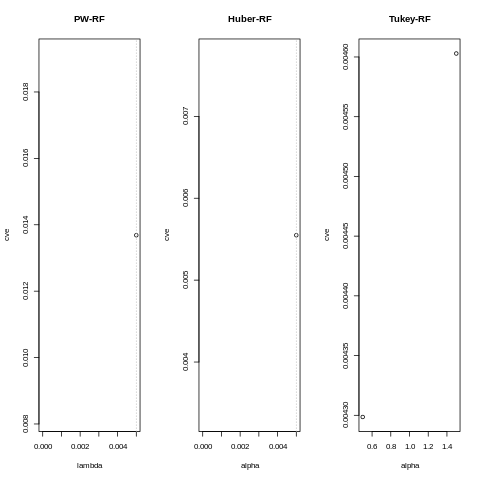

In [ ]:
%%R
RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5)
cvobj = cvfun(train=train, test=valid,RF=RF, plot=TRUE)

In [ ]:
%%R
#RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5)
RFpred <- predict(RF, newdata=test, forest.wt=TRUE, membership = T)
#cvobj = cvfun(train=train, test=valid,RF=RF, plot=FALSE) # Find optimized parameters
#grow forest and make predictions
#head(train)
# RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5)
# RFpred <- predict(RF, newdata=test, forest.wt=TRUE, membership = T)
OOBWeights <- RF$forest.wt   #weights for OOB predictions
PredWeights <- RFpred$forest.wt #weights for prediction of new cases
LPred.PWLS <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=6,lambda=cvobj$lamopt, method="PWLS", tol=10^-6)  #RFLOWESS calculations
LPred.HUBER <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=cvobj$alpha_opt_Huber,lambda=2, method="Huber", tol=10^-6)  #RFLOWESS calculations
LPred.TUKEY <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=cvobj$alpha_opt_Tukey,lambda=2, method="Tukey", tol=10^-6)  #RFLOWESS calculations
# LPred.PWLS <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=6,lambda=0.1, method="PWLS", tol=10^-6)  #RFLOWESS calculations
# LPred.HUBER <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=6,lambda=2, method="Huber", tol=10^-6)  #RFLOWESS calculations
# LPred.TUKEY <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=25,lambda=2, method="Tukey", tol=10^-6)  #RFLOWESS calculations


In [ ]:
%%R
Partitiondata=function(ntrain, cvreps, cvfolds){
  #set.seed(10)
  foldsize=ntrain/cvfolds
  TrainInd=array(dim=c(cvreps, cvfolds, foldsize))  
  for (rep in 1:cvreps){
    for (fold in 1:cvfolds){
      samp=sample(1:ntrain, ntrain, replace=FALSE)
      TrainInd[rep,fold,] = samp[(foldsize*(fold-1)+1):(fold*foldsize)]
    }
  }
  return(TrainInd)  
}

[1] 0 0 0 0 0


In [ ]:
%%R
cvfun=function(train,test, RF, lam_list=seq(0,0.005,by=0.005), alpha_list=seq(0,0.005,by=0.005), alpha_list_Tukey = seq(0.5,1.5,by=1), cvreps=2, cvfolds=10, trim=0.1,plot=FALSE){
    n=dim(dt)[1]
    MSRE_PW=MSRE_Tukey=MSRE_Huber=array(0,length(lam_list))
    #three dim
    #data = read.csv(paste("/Users/Pranay/Downloads/RF_CSV_files/m_8_p_3/m_8_p_3_",i-1,".csv",sep=''))
    #dt = data[1:500,] # defined dt
    #dt = # original training matrix data with y and x as columns
    #RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5) # Changed to capital Y
    RFpred <- predict(RF, newdata=test, forest.wt=TRUE, membership = T)
    for (i in 1:length(lam_list)){
      # valid_jk_id=as.vector(Trainrep_j[k,])
      # train_jk_id=as.vector(Trainrep_j[-k,])
      # train=data.frame(dt[train_jk_id,]) 
      # test=data.frame(dt[valid_jk_id,]) 
      OOBWeights <- RF$forest.wt   #weights for OOB predictions
      PredWeights <- RFpred$forest.wt #weights for prediction of new cases
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, lambda=lam_list[i], method="PWLS", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, capitalized Y, changed "PWRF" to "PWLS"
      MSRE_PW[i]= mean( (test$Y-LPred_i[[1]])^2,trim=trim)
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i],  method="Huber", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF
      #LPred_i <- LOWESSPred(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i], method="Huber", tol=10^-6)  #RFLOWESS calculations, changed alpha_lis to alpha_list
      MSRE_Huber[i]= mean( (test$Y-LPred_i[[1]])^2,trim=trim)
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list_Tukey[i], method="Tukey", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, changed alpha_lis to alpha_list
      MSRE_Tukey[i]= mean( (test$Y-LPred_i[[1]])^2,trim=trim) # Made all Y's capital, changed to Tukey
        
      
    }
    cvr_PW=MSRE_PW
    lamopt_PW=lam_list[which.min(cvr_PW)]
    cvr_Huber=MSRE_Huber
    alpha_opt_Huber=alpha_list[which.min(cvr_Huber)] # changed to alpha_list
    cvr_Tukey=MSRE_Tukey
    alpha_opt_Tukey=alpha_list_Tukey[which.min(cvr_Tukey)] # changed to alpha_list, might need to use a broader list for alpha_list and lamlist since it's optimized at the extreme
    if (plot){
        par(mfrow=c(1,3))
        plot(lam_list,cvr_PW,xlab='lambda',ylab='cve', main="PW-RF")
        abline(v=lam_list[which.min(cvr_PW)],lty=3,col='gray')
        plot(alpha_list,cvr_Huber,xlab='alpha',ylab='cve', main="Huber-RF")
        abline(v=lam_list[which.min(cvr_Huber)],lty=3,col='gray')
        plot(alpha_list_Tukey,cvr_Tukey,xlab='alpha',ylab='cve', main="Tukey-RF")
        abline(v=lam_list[which.min(cvr_Tukey)],lty=3,col='gray')
    }
    return(list(lam_list=lam_list,alpha_list=alpha_list,cvr_PW=cvr_PW,cvr_Huber=cvr_Huber, 
                cvr_Tukey=cvr_Tukey, lamopt=lamopt_PW, alpha_opt_Huber=alpha_opt_Huber,
                alpha_opt_Tukey=alpha_opt_Tukey))
}

In [ ]:
parent = '/Users/Pranay/Downloads/'
name = 'RealData'
path = os.path.join(parent,name)
zippath = os.path.join(path,'.zip')
if not os.path.exists(path):
  os.makedirs(path)

In [ ]:
%%R
ypred = matrix(0, length(test$Y),8)
path = "/Users/Pranay/Downloads/RealData/"
MSPE = matrix(0,1,4)
MAPE = matrix(0,1,4)
MSPE[1]=mean((test$Y-LPred.PWLS$predition)^2,trim=0.1)
MSPE[2]=mean((test$Y-LPred.HUBER$predition)^2,trim=0.1)
MSPE[3]=mean((test$Y-LPred.TUKEY$predition)^2,trim=0.1)
MSPE[4]=mean((test$Y-RFpred$predicted)^2,trim=0.1)
MAPE[1]=mean(abs((test$Y-LPred.PWLS$predition)),trim=0.1)
MAPE[2]=mean(abs((test$Y-LPred.HUBER$predition)),trim=0.1)
MAPE[3]=mean(abs((test$Y-LPred.TUKEY$predition)),trim=0.1)
MAPE[4]=mean(abs((test$Y-RFpred$predicted)),trim=0.1)

colnames(MSPE)=c("PWLS","Huber","Tukey","Original RF")
MSPE_mean = apply(MSPE, 2, mean)
write.csv(x=MSPE_mean,file=paste(path,"MSPE_mean",testyear,".csv",sep=''))

colnames(MSPE)=c("PWLS","Huber","Tukey","Original RF")
MSPE_stdev = apply(MSPE, 2, sd)
write.csv(x=MSPE_stdev,file=paste(path,"MSPE_stdev",testyear,".csv",sep=''))

colnames(MAPE)=c("PWLS","Huber","Tukey","Original RF")
MAPE_mean = apply(MAPE, 2, mean)
write.csv(x=MAPE_mean,file=paste(path,"MAPE_mean",testyear,".csv",sep=''))

colnames(MAPE)=c("PWLS","Huber","Tukey","Original RF")
MAPE_stdev = apply(MAPE, 2, sd)
write.csv(x=MAPE_stdev,file=paste(path,"MAPE_stdev",testyear,".csv",sep=''))

colnames(ypred)=c("PERMNO","yyyymm",'lagME',"xret","PWRF","Huber","Tukey","RF")
ypred[,4]=test$Y
# ypred[,3] =xy_test$lagME[1:100]
# ypred[,2] =xy_test$yyyymm[1:100]
# ypred[,1] = xy_test$PERMNO[1:100]
ypred[,3] =xy_test$lagME
ypred[,2] =xy_test$yyyymm
ypred[,1] = xy_test$PERMNO
ypred[,5]=  LPred.PWLS$predition
ypred[,6]=  LPred.HUBER$predition
ypred[,7]=  LPred.TUKEY$predition
ypred[,8]=  RFpred$predicted
write.csv(x=ypred,file=paste("/Users/Pranay/Downloads/RealData/prediction",testyear,".csv",sep=""))

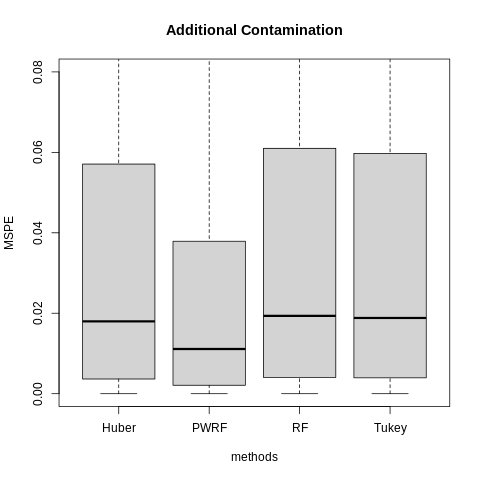

In [ ]:
%%R
PWRF_error = (test$Y-LPred.PWLS$predition)^2
Huber_error = (test$Y-LPred.HUBER$predition)^2
Tukey_error = (test$Y-LPred.TUKEY$predition)^2
RF_error = (test$Y-RFpred$predicted)^2
MSPE = c(PWRF_error,Huber_error,Tukey_error,RF_error)
methods = c(rep("PWRF",length(PWRF_error)),rep("Huber",length(Huber_error)),rep("Tukey",length(Tukey_error)),rep("RF",length(RF_error)))
boxplot(MSPE~methods,ylim=c(0,0.08),main="Additional Contamination")

In [ ]:
%%R
path = "/Users/Pranay/Downloads/RealData"
files2zip <- dir(path, full.names = TRUE)
zip(zipfile = paste(path), files = files2zip)

In [ ]:
zippath = path+".zip"
files.download(zippath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%R
head(LPred.PWLS$predition[1])

Streaming output truncated to the last 5000 lines.
  [15,] 0.0002857143 0.0002857143 0.0000000000 0.0000000000 0.0002222222
  [16,] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  [17,] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  [18,] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0002222222
  [19,] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  [20,] 0.0002857143 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  [21,] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
              [,146]       [,147]       [,148]       [,149]       [,150]
   [1,] 0.0000000000 0.0002500000 0.0004000000 0.0016468254 0.0000000000
   [2,] 0.0000000000 0.0006944444 0.0019079365 0.0000000000 0.0000000000
   [3,] 0.0000000000 0.0007579365 0.0006222222 0.0005357143 0.0000000000
   [4,] 0.0000000000 0.0002500000 0.0002500000 0.0007500000 0.0000000000
   [5,] 0.0009833333 0.0000000000 0.0000000000 0.0000000000 0.0006190476


In [ ]:
%%R
MSPE

          PWLS      Huber     Tukey Original RF
[1,] 0.0193098 0.01917037 0.0193098   0.0193098


In [ ]:
%%R

MSPE = matrix(0,nsim,4)
MAPE = matrix(0,nsim,4)

colnames(MSPE)=c("PWLS","Huber","Tukey","Original RF")
MSPE_mean = apply(MSPE, 2, mean)
write.csv(x=MSPE_mean,file=paste(path,"/m_",m,"_p_",p,"_results_MSPE_mean.csv",sep=''))

colnames(MSPE)=c("PWLS","Huber","Tukey","Original RF")
MSPE_stdev = apply(MSPE, 2, sd)
write.csv(x=MSPE_stdev,file=paste(path,"/m_",m,"_p_",p,"_results_MSPE_stdev.csv",sep=''))

colnames(MAPE)=c("PWLS","Huber","Tukey","Original RF")
MAPE_mean = apply(MAPE, 2, mean)
write.csv(x=MAPE_mean,file=paste(path,"/m_",m,"_p_",p,"_results_MAPE_mean.csv",sep=''))

colnames(MAPE)=c("PWLS","Huber","Tukey","Original RF")
MAPE_stdev = apply(MAPE, 2, sd)
write.csv(x=MAPE_stdev,file=paste(path,"/m_",m,"_p_",p,"_results_MAPE_stdev.csv",sep=''))

files2zip <- dir(path, full.names = TRUE)
zip(zipfile = paste(path), files = files2zip)
#predata
#LPred.PWLS[[2]] #Matrix of prediction weights
#LPred.PWLS[[3]] #number of iterations

sim= 1  sim= 2  sim= 3  sim= 4  sim= 5  sim= 6  sim= 7  sim= 8  sim= 9  sim= 10  sim= 11  sim= 12  sim= 13  sim= 14  sim= 15  sim= 16  sim= 17  sim= 18  sim= 19  sim= 20  sim= 21  sim= 22  sim= 23  sim= 24  sim= 25  sim= 26  sim= 27  sim= 28  sim= 29  sim= 30  

In [ ]:
m = 8
p = 2
path = "/Users/Pranay/Downloads/RF_CSV_files/m_"+str(m)+ "_p_"+str(p)+"/results_m_"+str(m)+"_p_"+str(p)
zippath = path+".zip"
files.download(zippath)
# shutil.make_archive(path, 'zip', path)
# files.download(zippath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%R
mat = matrix(1,10,4)
mat[1:5,4] = 0
mat

      [,1] [,2] [,3] [,4]
 [1,]    1    1    1    0
 [2,]    1    1    1    0
 [3,]    1    1    1    0
 [4,]    1    1    1    0
 [5,]    1    1    1    0
 [6,]    1    1    1    1
 [7,]    1    1    1    1
 [8,]    1    1    1    1
 [9,]    1    1    1    1
[10,]    1    1    1    1


In [ ]:
%%R
colnames(MSPE)=c("PWLS","Huber","Tukey","Original RF")
# MSPE_results = apply(MSPE, 2, mean)
# MSPE_results
apply(MSPE, 2, sd)
#boxplot(MSPE, main="MSPE, m=0.8, p=0.3")


       PWLS       Huber       Tukey Original RF 
   7.423598   10.021312   48.536584   30.534467 


In [ ]:
%%R
colnames(MAPE)=c("PWLS","Huber","Tukey","Original RF")
apply(MAPE, 2, mean)
#apply(MAPE, 2, sd)
#boxplot(MAPE,main="MAPE")

       PWLS       Huber       Tukey Original RF 
   5.347319    5.460634    6.432357   11.739879 


In [ ]:
%%R
Partitiondata=function(ntrain, cvreps, cvfolds){
  #set.seed(10)
  foldsize=ntrain/cvfolds
  TrainInd=array(dim=c(cvreps, cvfolds, foldsize))  
  for (rep in 1:cvreps){
    for (fold in 1:cvfolds){
      samp=sample(1:ntrain, ntrain, replace=FALSE)
      TrainInd[rep,fold,] = samp[(foldsize*(fold-1)+1):(fold*foldsize)]
    }
  }
  return(TrainInd)  
}

In [ ]:
%%R
cvfun=function(dt,lam_list=seq(2,8,by=0.5), alpha_list=seq(2,8,by=0.5), alpha_list_Tukey = seq(20,32,by=1), cvreps=2, cvfolds=10, trim=0.1,plot=FALSE){
    n=dim(dt)[1]
    TrainInd=Partitiondata(ntrain=n, cvreps=cvreps, cvfolds=cvfolds)
    MSRE_PW=MSRE_Tukey=MSRE_Huber=array(0,dim=c(length(lam_list),cvreps,cvfolds))
    #three dim
    #data = read.csv(paste("/Users/Pranay/Downloads/RF_CSV_files/m_8_p_3/m_8_p_3_",i-1,".csv",sep=''))
    #dt = data[1:500,] # defined dt
    #dt = # original training matrix data with y and x as columns
    for (i in 1:length(lam_list)){
      for (j in 1:cvreps){ # added "in"
        Trainrep_j=TrainInd[j,,] # get a cvfold id 
        for (k in 1:cvfolds){ # Changed from "k=1: cvfolds" to "k in 1:cvfolds"
          valid_jk_id=as.vector(Trainrep_j[k,])
          train_jk_id=as.vector(Trainrep_j[-k,])
          train=data.frame(dt[train_jk_id,]) 
          test=data.frame(dt[valid_jk_id,]) 
          RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5) # Changed to capital Y
          RFpred <- predict(RF, newdata=test, forest.wt=TRUE, membership = T)
          OOBWeights <- RF$forest.wt   #weights for OOB predictions
          PredWeights <- RFpred$forest.wt #weights for prediction of new cases
        
          LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, lambda=lam_list[i], method="PWLS", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, capitalized Y, changed "PWRF" to "PWLS"
          MSRE_PW[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=trim)
          LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i],  method="Huber", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF
          #LPred_i <- LOWESSPred(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i], method="Huber", tol=10^-6)  #RFLOWESS calculations, changed alpha_lis to alpha_list
          MSRE_Huber[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=trim)
          LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list_Tukey[i], method="Tukey", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, changed alpha_lis to alpha_list
          MSRE_Tukey[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=trim) # Made all Y's capital, changed to Tukey
        }
      }
    }
    cvr_PW=apply(MSRE_PW, 1, mean)
    lamopt_PW=lam_list[which.min(cvr_PW)]
    cvr_Huber=apply(MSRE_Huber, 1, mean)
    alpha_opt_Huber=alpha_list[which.min(cvr_Huber)] # changed to alpha_list
    cvr_Tukey=apply(MSRE_Tukey, 1, mean)
    alpha_opt_Tukey=alpha_list_Tukey[which.min(cvr_Tukey)] # changed to alpha_list, might need to use a broader list for alpha_list and lamlist since it's optimized at the extreme
    if (plot){
        par(mfrow=c(1,3))
        plot(lam_list,cvr_PW,xlab='lambda',ylab='cve', main="PW-RF")
        abline(v=lam_list[which.min(cvr_PW)],lty=3,col='gray')
        plot(alpha_list,cvr_Huber,xlab='alpha',ylab='cve', main="Huber-RF")
        abline(v=lam_list[which.min(cvr_Huber)],lty=3,col='gray')
        plot(alpha_list_Tukey,cvr_Tukey,xlab='alpha',ylab='cve', main="Tukey-RF")
        abline(v=lam_list[which.min(cvr_Tukey)],lty=3,col='gray')
    }
    return(list(lam_list=lam_list,alpha_list=alpha_list,cvr_PW=cvr_PW,cvr_Huber=cvr_Huber, 
                cvr_Tukey=cvr_Tukey, lamopt=lamopt_PW, alpha_opt_Huber=alpha_opt_Huber,
                alpha_opt_Tukey=alpha_opt_Tukey))
}

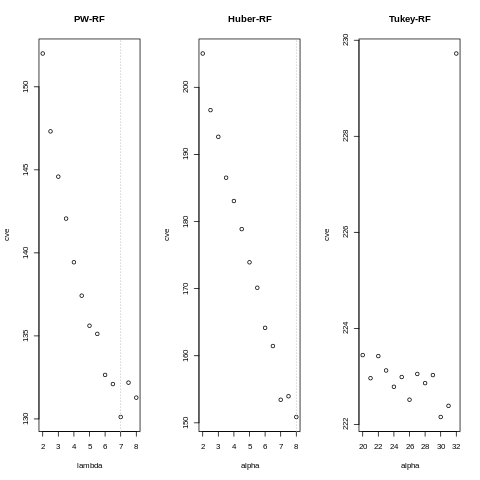

In [ ]:
%%R
i=29
data = read.csv(paste("/Users/Pranay/Downloads/RF_CSV_files/m_8_p_3/m_8_p_3_",i-1,".csv",sep=''))
dt = data[1:500,] # defined dt
#dt = # original training matrix data with y and x as columns
cvobj = cvfun(dt,plot=TRUE)

In [ ]:
%%R
names(cvobj)
cvobj$cvr_

[1]  99.69156  97.03286  96.65169  99.02809  99.46286 101.40134 103.54659


In [ ]:
%%R
lam_list=alpha_list=seq(1,10,by=0.5)
cvreps=2
cvfolds=5
TrainInd=Partitiondata(ntrain=500, cvreps=cvreps, cvfolds=cvfolds)
MSRE_PW=MSRE_Tukey=MSRE_Huber=array(0,dim=c(length(lam_list),cvreps,cvfolds))
#three dim
data = read.csv(paste("/Users/Pranay/Downloads/RF_CSV_files/m_8_p_3/m_8_p_3_",i-1,".csv",sep=''))
dt = data[1:500,] # defined dt
#dt = # original training matrix data with y and x as columns
for (i in 1:length(lam_list)){
  for (j in 1:cvreps){ # added "in"
    Trainrep_j=TrainInd[j,,] # get a cvfold id 
    for (k in 1:cvfolds){ # Changed from "k=1: cvfolds" to "k in 1:cvfolds"
      valid_jk_id=as.vector(Trainrep_j[k,])
      train_jk_id=as.vector(Trainrep_j[-k,])
      train=data.frame(dt[train_jk_id,]) 
      test=data.frame(dt[valid_jk_id,]) 
      RF <- rfsrc(Y~., data=train, forest.wt="oob", membership = T, nodesize=5) # Changed to capital Y
      RFpred <- predict(RF, newdata=test, forest.wt=TRUE, membership = T)
      OOBWeights <- RF$forest.wt   #weights for OOB predictions
      PredWeights <- RFpred$forest.wt #weights for prediction of new cases
    
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y,  lambda=lam_list[i], method="PWLS", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, capitalized Y, changed "PWRF" to "PWLS"
      MSRE_PW[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=0.1)
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i],  method="Huber", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF
      #LPred_i <- LOWESSPred(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i], method="Huber", tol=10^-6)  #RFLOWESS calculations, changed alpha_lis to alpha_list
      MSRE_Huber[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=0.1)
      LPred_i <- RobustRF(OOBWeights, PredWeights, TRAINY=train$Y, alpha=alpha_list[i], method="Tukey", tol=10^-6)  #RFLOWESS calculations, capitalized RobustRF, changed alpha_lis to alpha_list
      MSRE_Tukey[i,j,k]= mean( (test$Y-LPred_i[[1]])^2,trim=0.1) # Made all Y's capital, changed to Tukey
    }
  }
}


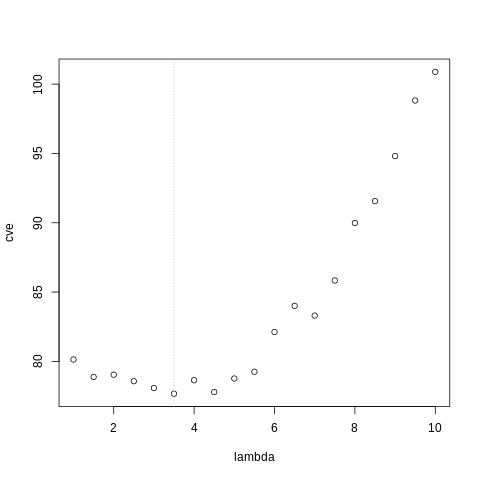

In [ ]:
%%R
cvr_PW=apply(MSRE_PW, 1, mean)
lamopt_PW=lam_list[which.min(cvr_PW)]
cvr_Huber=apply(MSRE_Huber, 1, mean)
alpha_opt_Huber=alpha_list[which.min(cvr_Huber)] # changed to alpha_list
cvr_Tukey=apply(MSRE_Tukey, 1, mean)
alpha_opt_Tukey=alpha_list[which.min(cvr_Tukey)] # changed to alpha_list, might need to use a broader list for alpha_list and lamlist since it's optimized at the extreme
cvr_Huber
cvr_Tukey
plot(lam_list,cvr_PW,xlab='lambda',ylab='cve')
abline(v=lam_list[which.min(cvr_PW)],lty=3,col='gray')
#lamopt_PW
#alpha_opt_Huber
#alpha_opt_Tukey